## ANN for Air Quality Index Prediction

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential


%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_pickle("./data/data_air_quality_index.pkl")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
data.shape

(1093, 9)

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
ann =Sequential()

In [16]:
X_train.shape[0]

874

In [19]:
# input layer
ann.add(Dense(input_dim=X_train.shape[1], units=128, kernel_initializer='glorot_normal', activation='relu',))

# hidden layers
ann.add(Dense(units=256, kernel_initializer='glorot_normal', activation='relu',))
ann.add(Dense(units=256, kernel_initializer='glorot_normal', activation='relu',))

# output layer
ann.add(Dense(units=1, kernel_initializer='glorot_normal', activation='linear'))

ann.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# fit
model = ann.fit(X_train, y_train, validation_split=0.3, batch_size=500, epochs=100)

Train on 611 samples, validate on 263 samples
Epoch 1/100
611/611 [==============================] - 0s 745us/sample - loss: 110.7706 - mean_absolute_error: 110.7706 - val_loss: 101.8522 - val_mean_absolute_error: 101.8522
Epoch 2/100
611/611 [==============================] - 0s 131us/sample - loss: 94.6194 - mean_absolute_error: 94.6194 - val_loss: 75.5866 - val_mean_absolute_error: 75.5866
Epoch 3/100
611/611 [==============================] - 0s 157us/sample - loss: 69.9396 - mean_absolute_error: 69.9396 - val_loss: 75.7741 - val_mean_absolute_error: 75.7741
Epoch 4/100
611/611 [==============================] - 0s 128us/sample - loss: 69.9743 - mean_absolute_error: 69.9743 - val_loss: 72.8964 - val_mean_absolute_error: 72.8964
Epoch 5/100
611/611 [==============================] - 0s 144us/sample - loss: 66.1746 - mean_absolute_error: 66.1747 - val_loss: 68.1519 - val_mean_absolute_error: 68.1519
Epoch 6/100
611/611 [==============================] - 0s 144us/sample - loss: 63.920

Epoch 47/100
611/611 [==============================] - 0s 131us/sample - loss: 51.1313 - mean_absolute_error: 51.1313 - val_loss: 48.6970 - val_mean_absolute_error: 48.6970
Epoch 48/100
611/611 [==============================] - 0s 119us/sample - loss: 45.1253 - mean_absolute_error: 45.1253 - val_loss: 48.5136 - val_mean_absolute_error: 48.5136
Epoch 49/100
611/611 [==============================] - 0s 131us/sample - loss: 44.3349 - mean_absolute_error: 44.3349 - val_loss: 47.7699 - val_mean_absolute_error: 47.7699
Epoch 50/100
611/611 [==============================] - 0s 131us/sample - loss: 44.2064 - mean_absolute_error: 44.2064 - val_loss: 47.2023 - val_mean_absolute_error: 47.2023
Epoch 51/100
611/611 [==============================] - 0s 131us/sample - loss: 43.1829 - mean_absolute_error: 43.1829 - val_loss: 59.7521 - val_mean_absolute_error: 59.7521
Epoch 52/100
611/611 [==============================] - 0s 124us/sample - loss: 50.9816 - mean_absolute_error: 50.9816 - val_loss:

611/611 [==============================] - 0s 124us/sample - loss: 41.7243 - mean_absolute_error: 41.7243 - val_loss: 45.5106 - val_mean_absolute_error: 45.5106
Epoch 95/100
611/611 [==============================] - 0s 123us/sample - loss: 41.6453 - mean_absolute_error: 41.6453 - val_loss: 45.2985 - val_mean_absolute_error: 45.2985
Epoch 96/100
611/611 [==============================] - 0s 118us/sample - loss: 41.4334 - mean_absolute_error: 41.4334 - val_loss: 45.2181 - val_mean_absolute_error: 45.2181
Epoch 97/100
611/611 [==============================] - 0s 106us/sample - loss: 41.4197 - mean_absolute_error: 41.4197 - val_loss: 47.6657 - val_mean_absolute_error: 47.6657
Epoch 98/100
611/611 [==============================] - 0s 126us/sample - loss: 42.5081 - mean_absolute_error: 42.5081 - val_loss: 46.1927 - val_mean_absolute_error: 46.1927
Epoch 99/100
611/611 [==============================] - 0s 118us/sample - loss: 41.4053 - mean_absolute_error: 41.4053 - val_loss: 46.2195 - va

In [21]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 256)              

In [23]:
pred_ann = ann.predict(X_test)

In [25]:
mean_squared_error(y_test, pred_ann)

4213.438488284867

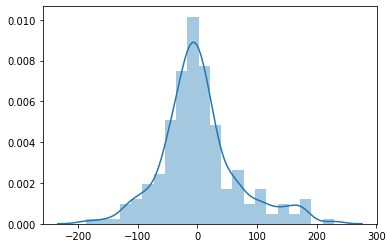

In [29]:
sns.distplot(y_test.values.reshape(-1,1)-pred_ann)

In [30]:
(y_test.values.reshape(-1,1)-pred_ann).var()

4203.946453516842